# Covid-19 Tweets sentiment analysis


### Importing Things we need

In [1]:
import pandas as pd 
import numpy as np 
from IPython.display import display

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import os
os.listdir('/kaggle/input/')

['covid-results', 'covid19-tweets']

### Importing the Dataset

In [3]:
df=pd.read_csv('../input/covid19-tweets/covid19_tweets.csv')
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


### select the needed columns

In [4]:
columns=['user_name','date','text']
df=df[columns]
df.head(10)

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...
5,🎹 Franz Schubert,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....
6,hr bartender,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...
7,Derbyshire LPC,2020-07-25 12:27:00,You now have to wear face coverings when out s...
8,Prathamesh Bendre,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...


### change the type of some columns

In [5]:
df.user_name=df.user_name.astype('category')
df.user_name=df.user_name.cat.codes # assign a unique numerical code to each category
df.date=pd.to_datetime(df.date).dt.date

In [6]:
df.head(5)

,user_name,date,text
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


### Picking out the tweet texts

In [7]:
texts=df.text
texts

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

### Removing URLs from tweets

In [8]:
remove_url=lambda x:re.sub(r'http\S+','',str(x))
texts_lr=texts.apply(remove_url)
texts_lr

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104           2020! The year of insanity! Lol! #COVID19 
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

### Converting all tweets to lowercase

In [9]:
to_lower=lambda x: x.lower()
texts_lr_lc=texts_lr.apply(to_lower)
texts_lr_lc

0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
179103    thanks @iamohmai for nominating me for the @wh...
179104           2020! the year of insanity! lol! #covid19 
179105    @ctvnews a powerful painting by juan lucena. i...
179106    more than 1,200 students test positive for #co...
179107    i stop when i see a stop\n\n@sabcnews\n@izinda...
Name: text, Length: 179108, dtype: object

### Removing punctuations

In [10]:
remove_puncs= lambda x:x.translate(str.maketrans('','',string.punctuation))
texts_lr_lc_np=texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0         if i smelled the scent of hand sanitizers toda...
1         hey yankees yankeespr and mlb  wouldnt it have...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv the one gift covid19 has give me i...
4         25 july  media bulletin on novel coronavirusup...
                                ...                        
179103    thanks iamohmai for nominating me for the who ...
179104               2020 the year of insanity lol covid19 
179105    ctvnews a powerful painting by juan lucena its...
179106    more than 1200 students test positive for covi...
179107    i stop when i see a stop\n\nsabcnews\nizindaba...
Name: text, Length: 179108, dtype: object

### Removing stopwords

In [11]:
more_words=['say','going','like','U','u','yankees','diane3443','today','hey','covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words=set(stopwords.words('english')) #nltk package
stop_words.update(more_words)

remove_words=lambda x: ' '.join([word for word in x.split() if word not in stop_words]) #.join is from package string
texts_lr_lc_np_ns=r=texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns

0         smelled scent hand sanitizers someone past wou...
1         yankeespr mlb wouldnt made sense players pay r...
2         wdunlap realdonaldtrump trump never claimed ho...
3         brookbanktv one gift give appreciation simple ...
4         25 july media bulletin novel coronavirusupdate...
                                ...                        
179103    thanks iamohmai nominating wearamask challenge...
179104                               2020 year insanity lol
179105    ctvnews powerful painting juan lucena tribute ...
179106    1200 students test positive major university a...
179107    stop see stop sabcnews izindabanews24 dailysun...
Name: text, Length: 179108, dtype: object

### create list of high friquent words out of all the tweets 

In [12]:
words_list=[word for line in texts_lr_lc_np_ns for word in line.split()]
words_list[:5]

['smelled', 'scent', 'hand', 'sanitizers', 'someone']

In [13]:
word_counts=Counter(words_list).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.head(5))
# px=import plotly.express
px.bar(word_df,x='word',y='frq',title='Most common words')

,word,frq
0,cases,18596
1,new,14683
2,people,9053
3,pandemic,7869
4,deaths,7429


### put the Cleaned text in main dataframe

In [14]:
display(df.head(5))
df.text=texts_lr_lc_np_ns
display(df.head(5))

,user_name,date,text
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


,user_name,date,text
0,89755,2020-07-25,smelled scent hand sanitizers someone past wou...
1,76403,2020-07-25,yankeespr mlb wouldnt made sense players pay r...
2,76147,2020-07-25,wdunlap realdonaldtrump trump never claimed ho...
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...
4,18398,2020-07-25,25 july media bulletin novel coronavirusupdate...


### addtional clean, special signals, re-clean

In [15]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['text'] = df['text'].apply(lambda x: clean_text(x))
display(df)

,user_name,date,text
0,89755,2020-07-25,smelled scent hand sanitizers someone past wou...
1,76403,2020-07-25,yankeespr mlb wouldnt made sense players pay r...
2,76147,2020-07-25,wdunlap realdonaldtrump trump never claimed ho...
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...
4,18398,2020-07-25,july media bulletin novel coronavirusupdates ...
...,...,...,...
179103,2024,2020-08-29,thanks iamohmai nominating wearamask challenge...
179104,36471,2020-08-29,year insanity lol
179105,8688,2020-08-29,ctvnews powerful painting juan lucena tribute ...
179106,28623,2020-08-29,students test positive major university abc news


In [16]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [17]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))
display(df)

,user_name,date,text
0,89755,2020-07-25,smelled scent hand sanitizers someone past wou...
1,76403,2020-07-25,yankeespr mlb wouldnt made sense players pay r...
2,76147,2020-07-25,wdunlap realdonaldtrump trump never claimed ho...
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...
4,18398,2020-07-25,july media bulletin novel coronavirusupdates ...
...,...,...,...
179103,2024,2020-08-29,thanks iamohmai nominating wearamask challenge...
179104,36471,2020-08-29,year insanity lol
179105,8688,2020-08-29,ctvnews powerful painting juan lucena tribute ...
179106,28623,2020-08-29,students test positive major university abc news


# Sentiment Analysis 

Getting the polarity scores for each tweet

In [18]:
sid=SentimentIntensityAnalyzer()
ps=lambda x:sid.polarity_scores(x)
sentiment_scores=df.text.apply(ps)
sentiment_scores

0         {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...
1         {'neg': 0.131, 'neu': 0.654, 'pos': 0.215, 'co...
2         {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...
3         {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
4         {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...
                                ...                        
179103    {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
179104    {'neg': 0.493, 'neu': 0.133, 'pos': 0.373, 'co...
179105    {'neg': 0.269, 'neu': 0.522, 'pos': 0.209, 'co...
179106    {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...
179107    {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp...
Name: text, Length: 179108, dtype: object

In [19]:
sentiment_df=pd.DataFrame(data=list(sentiment_scores))
display(sentiment_df)

,neg,neu,pos,compound
0,0.000,0.738,0.262,0.4939
1,0.131,0.654,0.215,0.2263
2,0.000,0.815,0.185,0.2057
3,0.000,0.563,0.437,0.7351
4,0.000,0.753,0.247,0.3182
...,...,...,...,...
179103,0.000,0.588,0.412,0.4939
179104,0.493,0.133,0.373,-0.2263
179105,0.269,0.522,0.209,-0.2023
179106,0.000,0.625,0.375,0.5574


### Labeling the scores based on the compound polarity value

In [20]:
labelize=lambda x:'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label']=sentiment_df.compound.apply(labelize)
display(sentiment_df.head(10))

,neg,neu,pos,compound,label
0,0.000,0.738,0.262,0.4939,positive
1,0.131,0.654,0.215,0.2263,positive
2,0.000,0.815,0.185,0.2057,positive
3,0.000,0.563,0.437,0.7351,positive
4,0.000,0.753,0.247,0.3182,positive
5,0.286,0.714,0.000,-0.4951,negative
6,0.000,1.000,0.000,0.0000,neutral
7,0.000,1.000,0.000,0.0000,neutral
8,0.000,0.426,0.574,0.6597,positive
9,0.000,0.769,0.231,0.2732,positive


### let's join two dataframes

In [21]:
display(df.head(5))
data=df.join(sentiment_df.label)
display(data.head(73240))
mydata = data['text']
mydata.to_csv('mydata.csv',index = False)

,user_name,date,text
0,89755,2020-07-25,smelled scent hand sanitizers someone past wou...
1,76403,2020-07-25,yankeespr mlb wouldnt made sense players pay r...
2,76147,2020-07-25,wdunlap realdonaldtrump trump never claimed ho...
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...
4,18398,2020-07-25,july media bulletin novel coronavirusupdates ...


,user_name,date,text,label
0,89755,2020-07-25,smelled scent hand sanitizers someone past wou...,positive
1,76403,2020-07-25,yankeespr mlb wouldnt made sense players pay r...,positive
2,76147,2020-07-25,wdunlap realdonaldtrump trump never claimed ho...,positive
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...,positive
4,18398,2020-07-25,july media bulletin novel coronavirusupdates ...,positive
...,...,...,...,...
73235,73378,2020-08-04,crozrx eaonc hwakeleemd hosseinborghaei chris...,neutral
73236,55453,2020-08-04,statistics south africa,neutral
73237,18544,2020-08-04,csmtshm daily specialparcel train extended upto,neutral
73238,13045,2020-08-04,asiapacific august manila back lockdown virus...,negative


### Plotting the sentiment score counts

In [22]:
counts_df=data.label.value_counts().reset_index()
display(counts_df)

,index,label
0,positive,68578
1,neutral,63649
2,negative,46881


<AxesSubplot:xlabel='index', ylabel='label'>

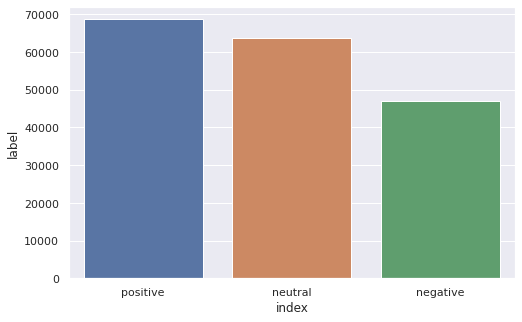

In [23]:
plt.figure(figsize=(8,5)) 
sns.barplot(x='index',y='label',data=counts_df)

### group number of counts by
<li>date
<li>positive,neutral,negative

In [24]:
data_agg=data[['user_name','date','label']]
display(data_agg.head(5))

,user_name,date,label
0,89755,2020-07-25,positive
1,76403,2020-07-25,positive
2,76147,2020-07-25,positive
3,84572,2020-07-25,positive
4,18398,2020-07-25,positive


In [25]:
data_agg=data_agg.groupby(['date','label'])
display(data_agg.head(5))

,user_name,date,label
0,89755,2020-07-25,positive
1,76403,2020-07-25,positive
2,76147,2020-07-25,positive
3,84572,2020-07-25,positive
4,18398,2020-07-25,positive
...,...,...,...
175041,29674,2020-08-29,negative
175042,85337,2020-08-29,neutral
175043,71400,2020-08-29,positive
175044,23968,2020-08-29,positive


In [26]:
data_agg=data_agg.count()
display(data_agg.head(5))

user_name
date       label              
2020-07-24 negative         84
           neutral          96
           positive        115
2020-07-25 negative       4359
           neutral        5912

In [27]:
data_agg=data_agg.reset_index()
display(data_agg.head(5))

,date,label,user_name
0,2020-07-24,negative,84
1,2020-07-24,neutral,96
2,2020-07-24,positive,115
3,2020-07-25,negative,4359
4,2020-07-25,neutral,5912


### actually the 'user_name' is the count of users, so need to change the column name

In [28]:
data_agg.columns=['date','label','counts']
display(data_agg.head())

,date,label,counts
0,2020-07-24,negative,84
1,2020-07-24,neutral,96
2,2020-07-24,positive,115
3,2020-07-25,negative,4359
4,2020-07-25,neutral,5912


In [29]:
px.line(data_agg,x='date',y='counts',color='label',
       title='Daily Tweet Sentimental Analysis')

In [30]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))
display(df)

,user_name,date,text
0,89755,2020-07-25,smelled scent hand sanitizers someone past wou...
1,76403,2020-07-25,yankeespr mlb wouldnt made sense players pay r...
2,76147,2020-07-25,wdunlap realdonaldtrump trump never claimed ho...
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...
4,18398,2020-07-25,july media bulletin novel coronavirusupdates ...
...,...,...,...
179103,2024,2020-08-29,thanks iamohmai nominating wearamask challenge...
179104,36471,2020-08-29,year insanity lol
179105,8688,2020-08-29,ctvnews powerful painting juan lucena tribute ...
179106,28623,2020-08-29,students test positive major university abc news


### Generate wordcloud for this period

In [31]:
from wordcloud import WordCloud

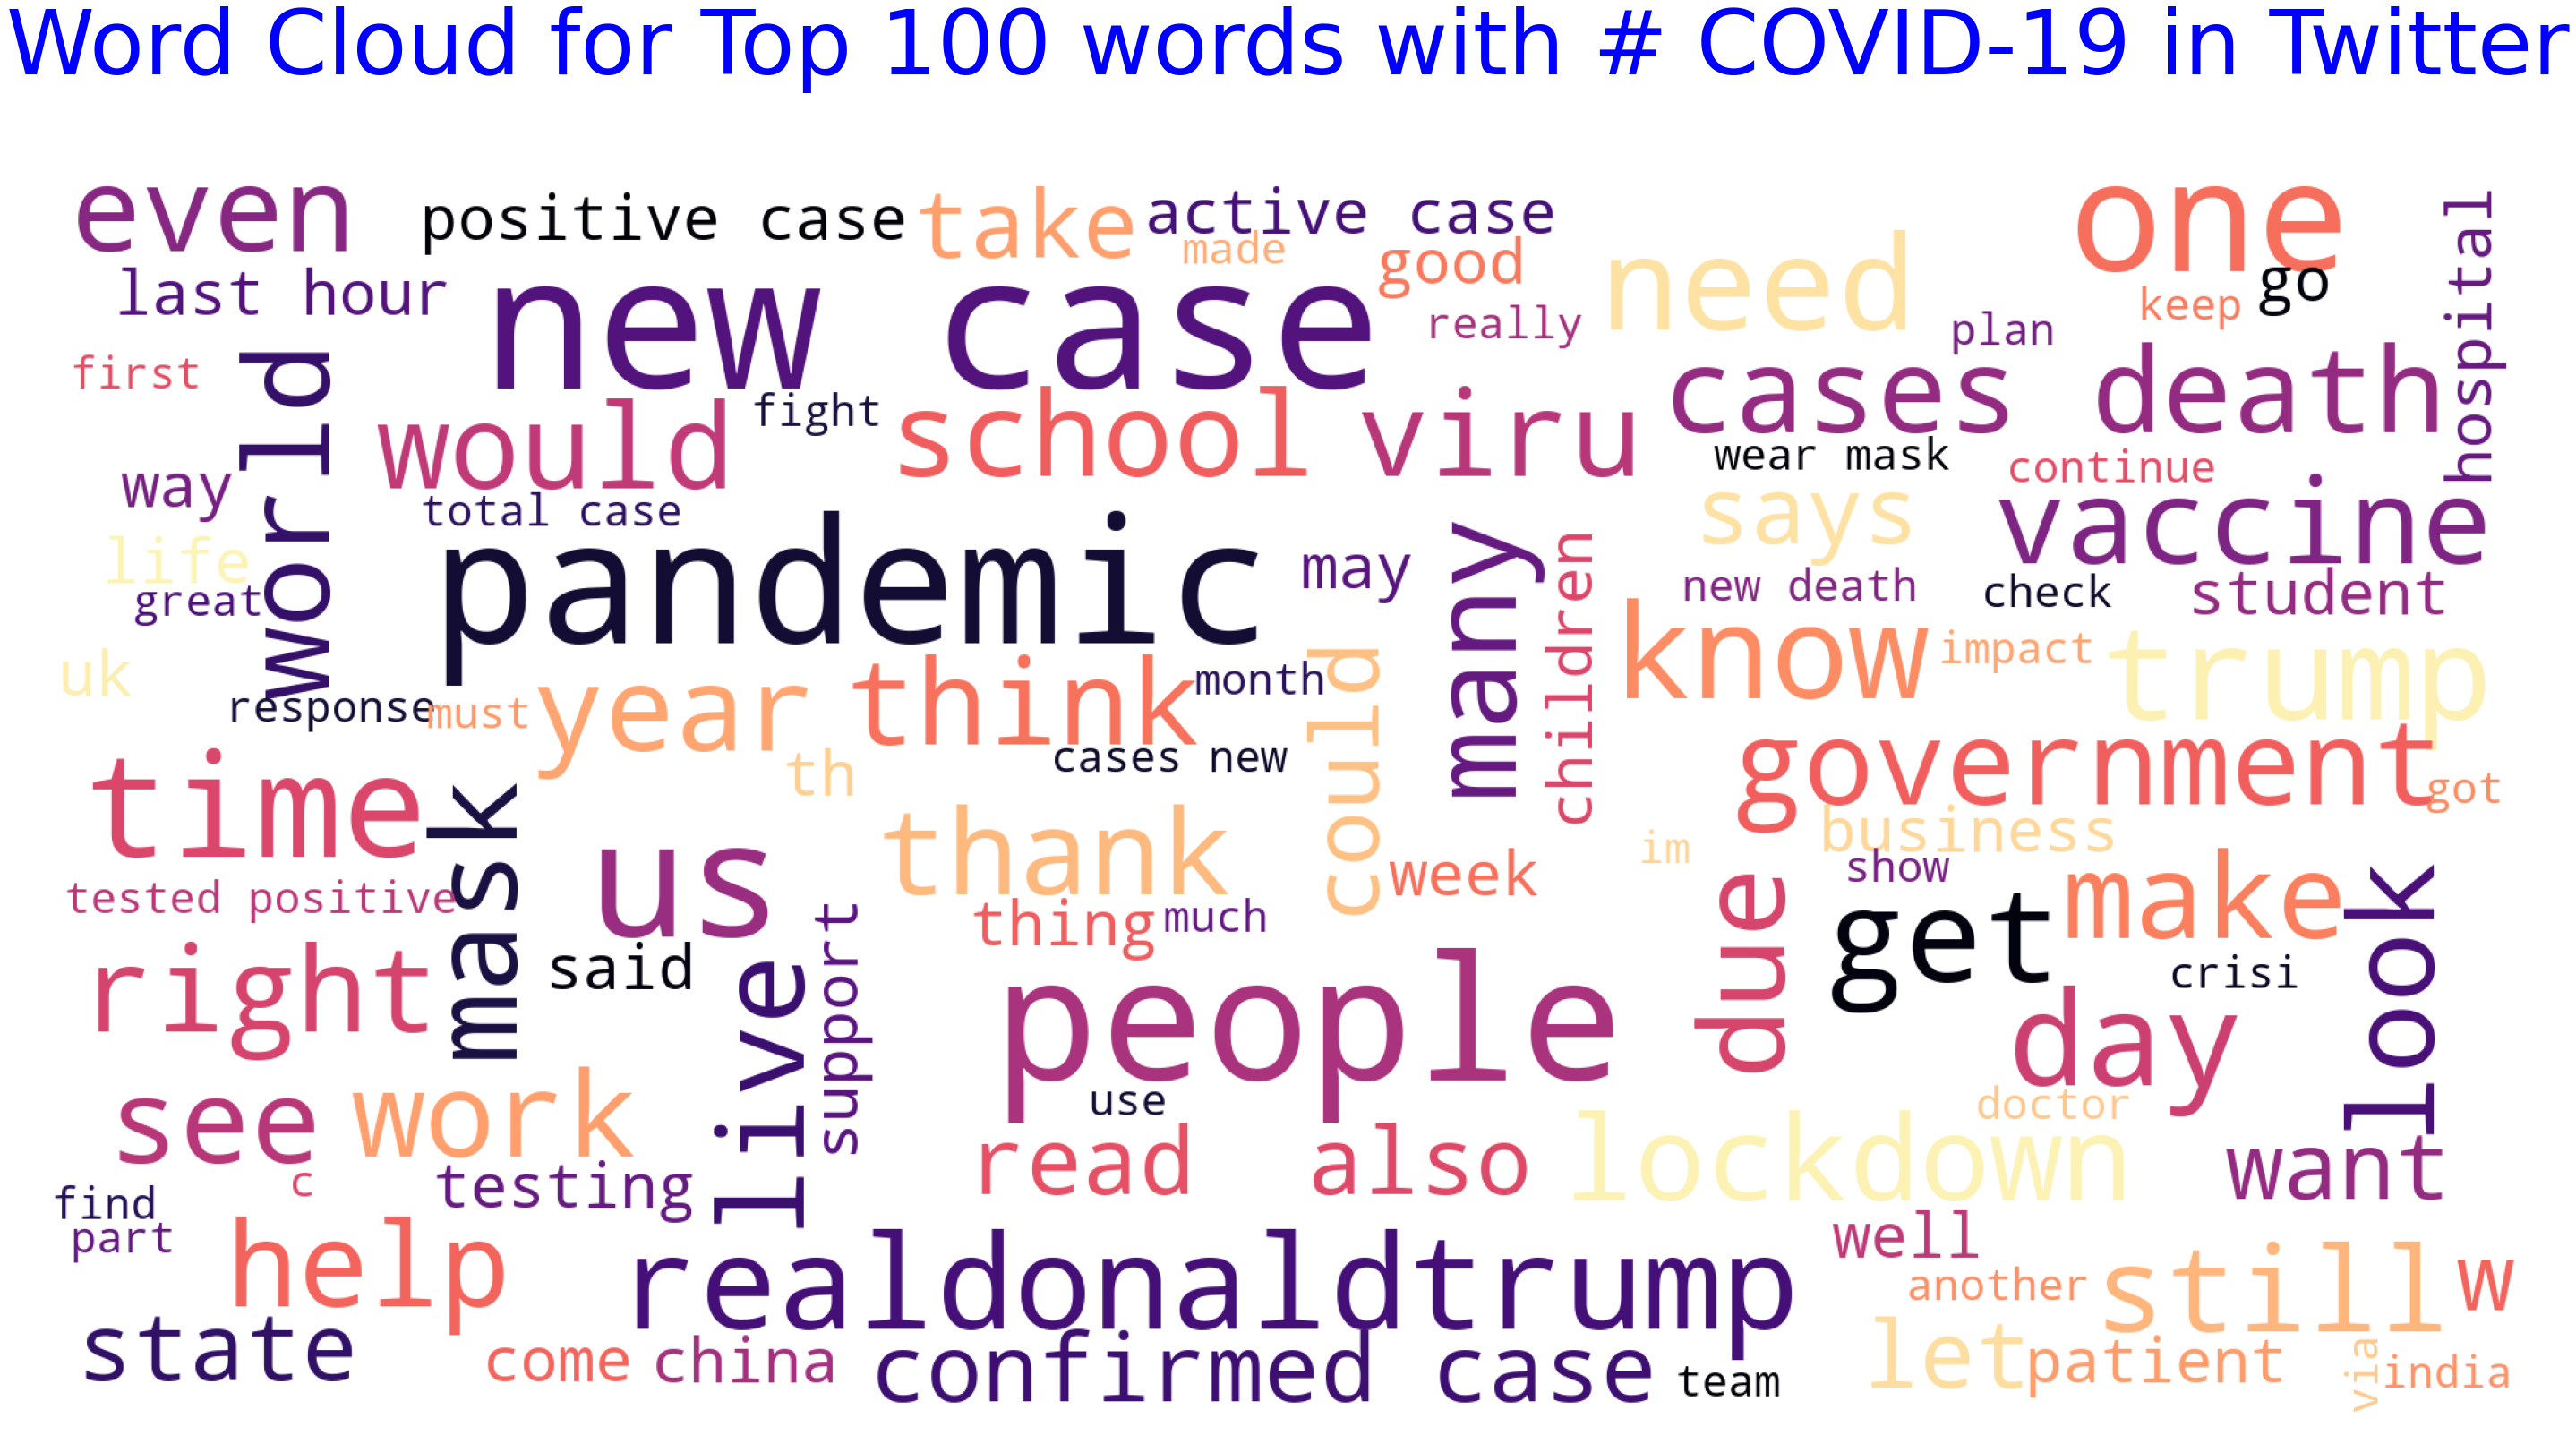

In [32]:
cut_text = " ".join(df.text)
max_words=100
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(stop_words),
                    max_words=max_words,
                    max_font_size=30,
                    scale=5,
    colormap='magma',
                    random_state=1).generate(cut_text)
fig = plt.figure(1, figsize=(50,50))
plt.axis('off')
plt.title('Word Cloud for Top '+str(max_words)+' words with # COVID-19 in Twitter\n', fontsize=100,color='blue')
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

### 10000 Cloud NLP API analyse

In [33]:
df=pd.read_csv('../input/covid-results/intern_results.csv')
df.head(5)

,Unnamed: 0,text,score,magnitude
0,0,NaN,0.0%,0.0%
1,0,smelled scent hand sanitizers someone past wou...,-70.0%,70.0%
2,0,yankeespr mlb wouldnt made sense players pay r...,-70.0%,70.0%
3,0,wdunlap realdonaldtrump trump never claimed ho...,-60.0%,60.0%
4,0,brookbanktv one gift give appreciation simple ...,80.0%,80.0%


### delete NaN results

In [34]:
df = df.dropna()
df.head()

,Unnamed: 0,text,score,magnitude
1,0,smelled scent hand sanitizers someone past wou...,-70.0%,70.0%
2,0,yankeespr mlb wouldnt made sense players pay r...,-70.0%,70.0%
3,0,wdunlap realdonaldtrump trump never claimed ho...,-60.0%,60.0%
4,0,brookbanktv one gift give appreciation simple ...,80.0%,80.0%
5,0,july media bulletin novel coronavirusupdates ...,20.0%,20.0%


In [35]:
score_counts=Counter(df['score'])
score_counts

Counter({'-70.0%': 701,
         '-60.0%': 720,
         '80.0%': 229,
         '20.0%': 495,
         '-80.0%': 510,
         '0.0%': 1663,
         '-20.0%': 650,
         '-40.0%': 641,
         '10.0%': 651,
         '30.0%': 363,
         '-10.0%': 765,
         '-30.0%': 603,
         '70.0%': 211,
         '-50.0%': 609,
         '50.0%': 345,
         '60.0%': 242,
         '40.0%': 309,
         '-90.0%': 50,
         '90.0%': 227})

In [36]:
score_df=pd.DataFrame([score_counts])
score_df


,-70.0%,-60.0%,80.0%,20.0%,-80.0%,0.0%,-20.0%,-40.0%,10.0%,30.0%,-10.0%,-30.0%,70.0%,-50.0%,50.0%,60.0%,40.0%,-90.0%,90.0%
0,701,720,229,495,510,1663,650,641,651,363,765,603,211,609,345,242,309,50,227


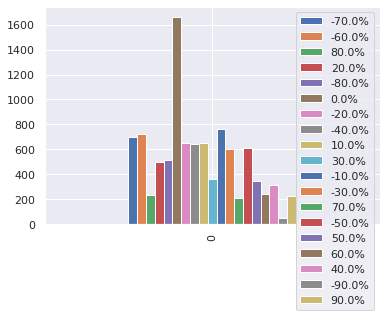

In [37]:
score_df.plot(kind='bar')
plt.show()

### magnitude analysemagnitude

In [38]:
magnitude_counts=Counter(df['magnitude'])
magnitude_counts

Counter({'70.0%': 912,
         '60.0%': 964,
         '80.0%': 738,
         '20.0%': 1146,
         '0.0%': 1654,
         '40.0%': 949,
         '10.0%': 1419,
         '30.0%': 965,
         '50.0%': 953,
         '90.0%': 278,
         '270.0%': 1,
         '100.0%': 1,
         '160.0%': 4})

In [39]:
magnitude_df=pd.DataFrame([magnitude_counts])
magnitude_df

,70.0%,60.0%,80.0%,20.0%,0.0%,40.0%,10.0%,30.0%,50.0%,90.0%,270.0%,100.0%,160.0%
0,912,964,738,1146,1654,949,1419,965,953,278,1,1,4


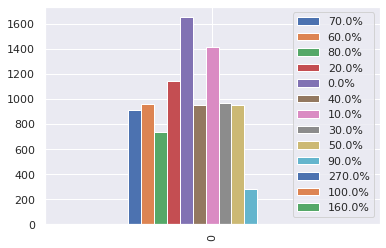

In [40]:
magnitude_df.plot(kind='bar')
plt.show()

Emotional score is between -1.0 (negative) and 1.0 (positive), corresponding to the overall emotional tendency of the text.

Magnitude indicates the overall strength of the given text (including positive and negative), between 0.0 and + INF. Unlike score, Magnitude is not normalized; each emotional expression in text (positive and negative) will affect the text of the text (so the length of the long text block may be large). (The bigger the influence higher)


For the top 100,000 Twitter, the Cloud NLP API is analyzed.

It can be found that the most people are still in the way to conservatively conservative, without the impact on the epidemic, has a strong front or negative reaction.

In addition to some people who are usually viewed, COVID-19 epidemic has different degrees of affected others, and most of them are negative.

Conclusion: For new products launched during the epidemic, due to more positive psychological signals, such as using warm colors, soft fonts and border design, etc., expressing soothing for user psychology. System algorithm can be recommended more recommended

May be interesting, solving the bad emotional content that the user is isolated at home